In [2]:
# ---------------------------------------------------------------
# 📘 Import Libraries
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 🧾 Load Dataset and Add Required Columns
# ---------------------------------------------------------------
df = pd.read_csv("teacher_ratings.csv")

# Add missing columns (for Practical 2 compatibility)
np.random.seed(42)
df["age"] = np.random.randint(25, 65, size=len(df))             # Teacher ages
df["course_level"] = np.random.choice(["Lower", "Upper"], len(df))  # Course division
df["evaluation"] = df["student_rating"]                         # Alias for clarity

# Preview dataset
print("✅ Dataset loaded and updated:")
print(df.head())



✅ Dataset loaded and updated:
   teacher_id professor_name gender    beauty  student_rating tenured  \
0           1        Dr. Kim   Male  8.057793        6.851041      No   
1           2        Dr. Lee   Male  6.263330        7.888409     Yes   
2           3      Dr. Patel   Male  5.536067        6.457045     Yes   
3           4        Dr. Lee   Male  7.009688        7.932460     Yes   
4           5        Dr. Lee   Male  5.615055        8.254685     Yes   

   subject  age course_level  evaluation  
0     Math   63        Upper    6.851041  
1  History   53        Lower    7.888409  
2  Physics   39        Lower    6.457045  
3  Biology   32        Upper    7.932460  
4  History   45        Upper    8.254685  


In [3]:

# ---------------------------------------------------------------
# Q1. Identify duplicate cases (professor_name) and calculate stats
# ---------------------------------------------------------------
print("\nQ1. Duplicate Professors and Age Statistics:")

# Identify duplicate cases based on professor_name
duplicates = df[df.duplicated(subset=["professor_name"], keep=False)]
print(f"\nNumber of duplicate professors: {duplicates['professor_name'].nunique()}")
print("\nDuplicate professor records:")
print(duplicates[["professor_name", "age", "evaluation"]].head())

# Average and SD for age (all observations)
mean_age_all = df["age"].mean()
std_age_all = df["age"].std()
print(f"\nAll Observations → Mean Age: {mean_age_all:.2f}, Std Dev: {std_age_all:.2f}")

# Filter one observation per professor (94 total)
unique_df = df.drop_duplicates(subset=["professor_name"], keep="first").head(94)
mean_age_unique = unique_df["age"].mean()
std_age_unique = unique_df["age"].std()
print(f"Unique Professors (94) → Mean Age: {mean_age_unique:.2f}, Std Dev: {std_age_unique:.2f}")



Q1. Duplicate Professors and Age Statistics:

Number of duplicate professors: 6

Duplicate professor records:
  professor_name  age  evaluation
0        Dr. Kim   63    6.851041
1        Dr. Lee   53    7.888409
2      Dr. Patel   39    6.457045
3        Dr. Lee   32    7.932460
4        Dr. Lee   45    8.254685

All Observations → Mean Age: 43.79, Std Dev: 11.56
Unique Professors (94) → Mean Age: 54.50, Std Dev: 10.65



Q2. Average Evaluation by Course Level:
course_level
Lower    7.282502
Upper    7.116668
Name: evaluation, dtype: float64


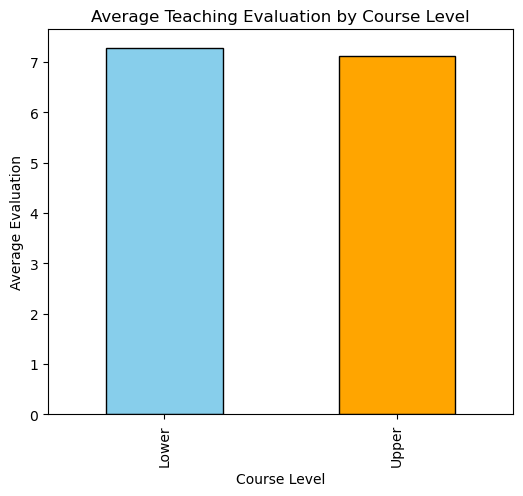

👉 Interpretation: If 'Lower' bars are higher, lower-division courses receive higher evaluations.


In [4]:
# ---------------------------------------------------------------
# Q2. Bar chart - Lower vs Upper division average evaluations
# ---------------------------------------------------------------
print("\nQ2. Average Evaluation by Course Level:")

avg_eval = df.groupby("course_level")["evaluation"].mean()
print(avg_eval)

plt.figure(figsize=(6,5))
avg_eval.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Average Teaching Evaluation by Course Level")
plt.xlabel("Course Level")
plt.ylabel("Average Evaluation")
plt.show()

print("👉 Interpretation: If 'Lower' bars are higher, lower-division courses receive higher evaluations.")




Q3. Scatter Plot - Age vs Evaluation:


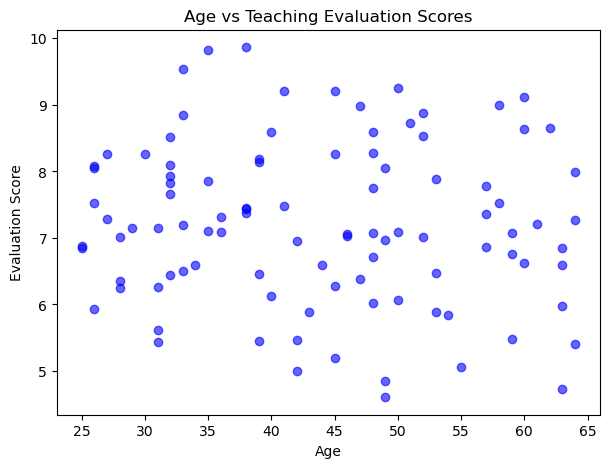

In [5]:
# ---------------------------------------------------------------
# Q3. Relationship between Age and Evaluation
# ---------------------------------------------------------------
print("\nQ3. Scatter Plot - Age vs Evaluation:")
plt.figure(figsize=(7,5))
plt.scatter(df["age"], df["evaluation"], color="blue", alpha=0.6)
plt.title("Age vs Teaching Evaluation Scores")
plt.xlabel("Age")
plt.ylabel("Evaluation Score")
plt.show()


Q4. Gender-Differentiated Scatter Plot:


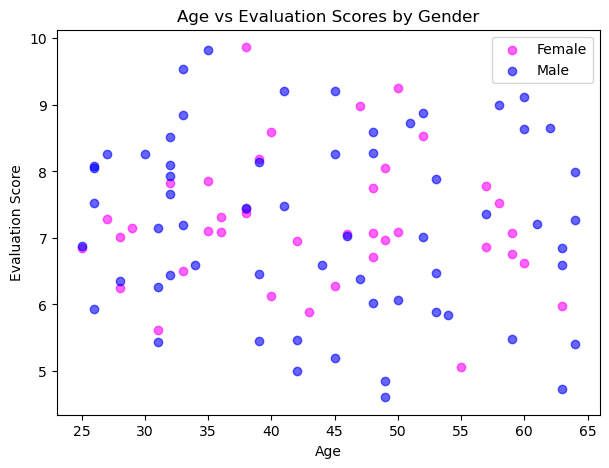

In [6]:
# ---------------------------------------------------------------
# Q4. Gender-differentiated scatter plot
# ---------------------------------------------------------------
print("\nQ4. Gender-Differentiated Scatter Plot:")
colors = {"Male": "blue", "Female": "magenta"}

plt.figure(figsize=(7,5))
for gender, group in df.groupby("gender"):
    plt.scatter(group["age"], group["evaluation"], alpha=0.6, label=gender, color=colors[gender])
plt.title("Age vs Evaluation Scores by Gender")
plt.xlabel("Age")
plt.ylabel("Evaluation Score")
plt.legend()
plt.show()


Q5. Scatter Plot - Age vs Evaluation (Gender + Tenure):


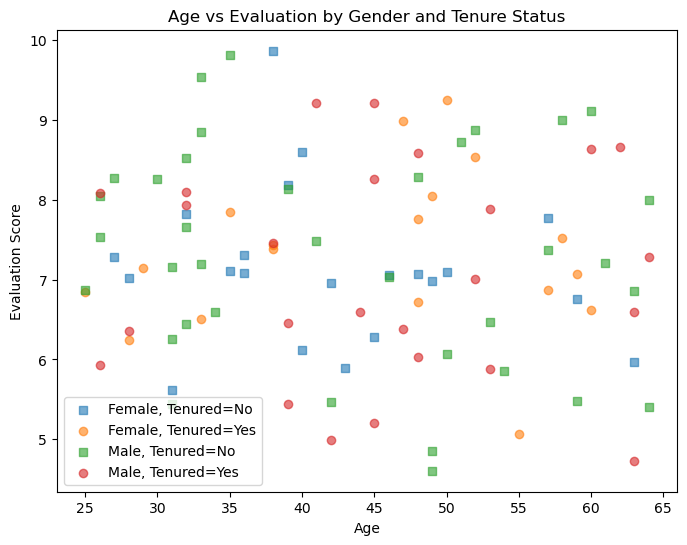

In [7]:
# ---------------------------------------------------------------
# Q5. Scatterplot of Age and Evaluation, differentiated by Gender and Tenure
# ---------------------------------------------------------------
print("\nQ5. Scatter Plot - Age vs Evaluation (Gender + Tenure):")

markers = {"Yes": "o", "No": "s"}  # Circles for tenured, squares for non-tenured

plt.figure(figsize=(8,6))
for (gender, tenure), group in df.groupby(["gender", "tenured"]):
    plt.scatter(group["age"], group["evaluation"], 
                alpha=0.6, label=f"{gender}, Tenured={tenure}",
                marker=markers[tenure])
plt.title("Age vs Evaluation by Gender and Tenure Status")
plt.xlabel("Age")
plt.ylabel("Evaluation Score")
plt.legend()
plt.show()
